In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.shape

(891, 12)

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Missing Values Types

1. Missing Completely at Random, MCAR
<br>
    MCAR occurs when the probability of missing values in a variable is the same for all samples.
<br>
<br>
2. Missing Not At Random, MNAR
<br>
    The probability of missing values, not at random, depends on information that has not been recorded, and this information also predicts the missing values.
<br>
<br>
3. Missing At Random, MAR
<br>
    The probability of missing values, at random, in a variable depends only on the available information in other predictors.
<br>
    For example, when men and women respond to the question “have you ever taken parental leave?”, men would tend to ignore the question at a different rate compared to women.

<AxesSubplot:>

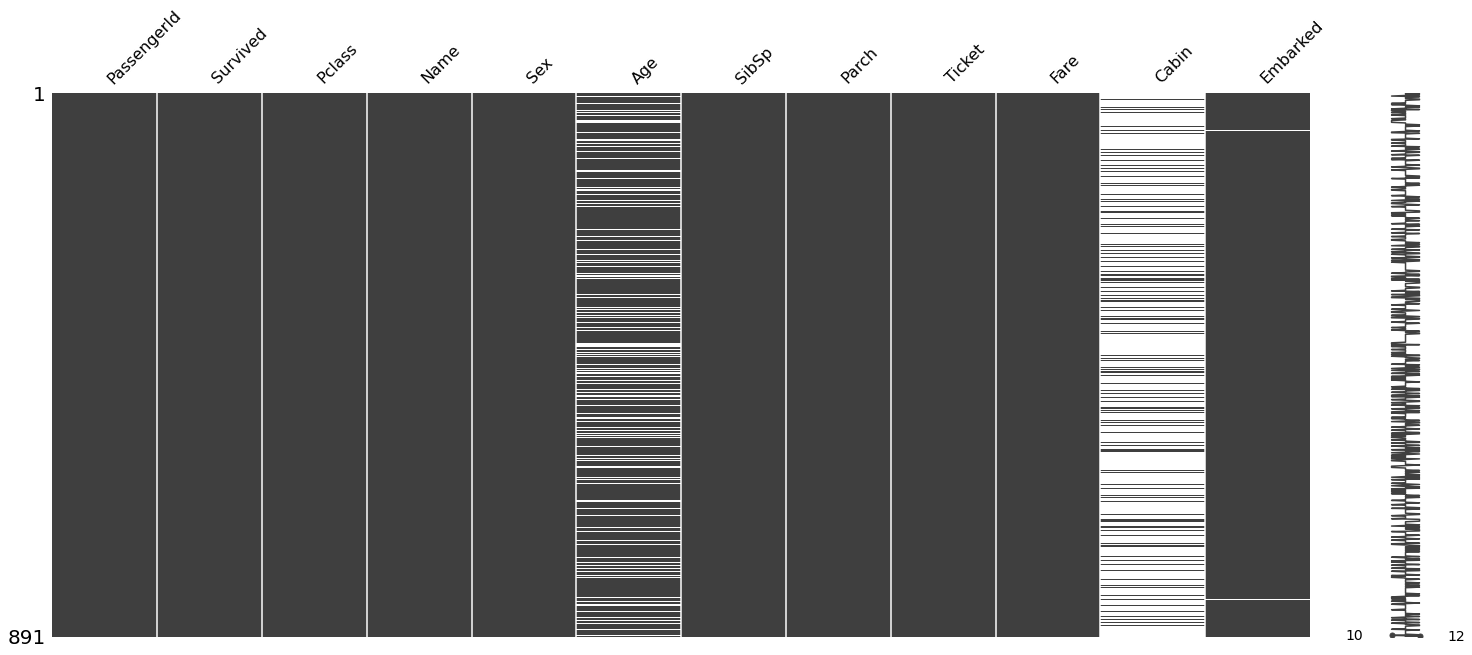

In [4]:
import missingno as msno

msno.matrix(df)

In [5]:
df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0)

In [6]:
df['cabin_null'].mean()

0.7710437710437711

In [7]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

In [8]:
df1 = df.copy()

### All the techniques of handling ,issing values

1. Removing data for null values
2. Mean/ Median/Mode replacement - MCAR
3. Random Sample Imputation - MCAR
4. Capturing NAN values with a new feature
5. End of Distribution imputation
6. Arbitrary imputation
7. Frequent categories imputation
8. One Hot Encoding

#### 1. Removing data for null values - MCAR

In [9]:
df1.dropna(inplace = True)

In [10]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
cabin_null     0
dtype: int64

In [11]:
df1.shape

(183, 13)

In [12]:
print("Number of removed features: ", df.shape[0] - df1.shape[0])

Number of removed features:  708


#### 2. Mean/Mode/Median - MCAR

In [13]:
df2 = pd.read_csv('titanic.csv',usecols = ['Age','Fare','Survived'])
df2.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [14]:
df2.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [15]:
print(df2.mean())

Survived     0.383838
Age         29.699118
Fare        32.204208
dtype: float64


In [16]:
print(df2.mode())

   Survived   Age  Fare
0         0  24.0  8.05


In [17]:
print(df2.median())

Survived     0.0000
Age         28.0000
Fare        14.4542
dtype: float64


In [18]:
df2['Age_Median'] = df2['Age'].fillna(df2.Age.median())

In [19]:
df2.isnull().sum()

Survived        0
Age           177
Fare            0
Age_Median      0
dtype: int64

In [20]:
print(df2['Age'].std())
print(df2['Age_Median'].std())

14.526497332334044
13.019696550973194


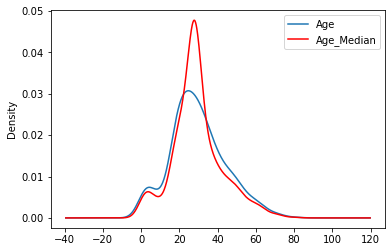

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot()
df2['Age'].plot(kind = 'kde', ax = ax)
df2.Age_Median.plot(kind = 'kde', ax = ax, color = 'red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')
plt.show()

#### Advantages
1. Easy to implement (Robust to outliers)
2. Faster way to obtain the complete dataset

#### Disadvantages
1. Change or Distortion in the original variance
2. Impacts Correlation

<b>3. Random Sample Imputation - MCAR<b>

In [22]:
df3 = pd.read_csv('titanic.csv',usecols = ['Age','Fare','Survived'])

In [23]:
def impute_nan(df3,variable,median):
    
    df3[variable + "_median"] = df3[variable].fillna(median)
    df3[variable + "_random"] = df3[variable]
    
    ##It will have the random sample to fill the na
    random_sample = df3[variable].dropna().sample(df3[variable].isnull().sum(),random_state = 0)
    
    ##pandas need to have same index in order to merge the dataset
    random_sample.index = df3[df3[variable].isnull()].index
    
    df3.loc[df3[variable].isnull(),variable + '_random'] = random_sample

In [24]:
median = df3.Age.median()

In [25]:
impute_nan(df3, "Age", median)

In [26]:
df3.head(20)

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.00
1,1,38.0,71.2833,38.0,38.00
2,1,26.0,7.9250,26.0,26.00
3,1,35.0,53.1000,35.0,35.00
4,0,35.0,8.0500,35.0,35.00
5,0,NaN,8.4583,28.0,28.00
6,0,54.0,51.8625,54.0,54.00
7,0,2.0,21.0750,2.0,2.00
8,1,27.0,11.1333,27.0,27.00
9,1,14.0,30.0708,14.0,14.00


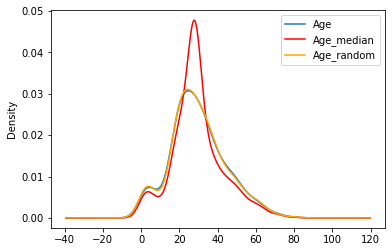

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
df3['Age'].plot(kind='kde', ax=ax)
df3.Age_median.plot(kind='kde', ax=ax, color='red')
df3.Age_random.plot(kind='kde', ax=ax, color='orange')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

#### Advantages
1. Easy To implement
2. There is less distortion in variance

#### Disadvantage
1. Every situation randomness wont work

#### 4. Capturing NAN values with a new feature - MNAR

In [28]:
df4 = pd.read_csv('titanic.csv', usecols = ['Age','Fare','Survived'])

In [29]:
df4['Age_NAN'] = np.where(df4['Age'].isnull(),1,0)

In [30]:
df4

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,NaN,23.4500,1
889,1,26.0,30.0000,0


In [31]:
df4.Age.median()

28.0

In [32]:
df4['Age'].fillna(df4.Age.median(),inplace = True)
df4.head(20)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### Advantages
1. Easy to implement
2. Captures the importance of missing values

#### Disadvantages
1. Creating Additional Features(Curse of Dimensionality)

#### 5. End of Distribution imputation

In [33]:
df5 = pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])

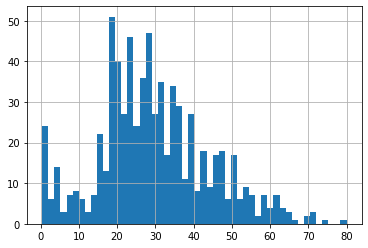

In [34]:
df5.Age.hist(bins = 50)
plt.show()

In [35]:
extreme = df5.Age.mean() + 3 * df5.Age.std()

In [36]:
extreme

73.27860964406095

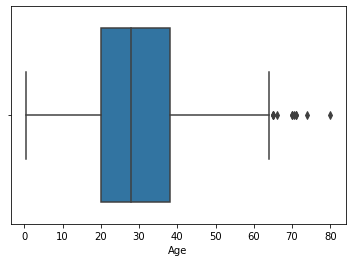

In [37]:
import seaborn as sns
sns.boxplot(x = df5['Age'])
plt.show()

In [38]:
def impute_nan(df5,variable,median,extreme):
    df5[variable + "_end_distribution"] = df5[variable].fillna(extreme)
    df5[variable].fillna(median, inplace = True)

In [39]:
impute_nan(df5, 'Age', df5.Age.median(), extreme)

In [40]:
df5.head(20)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


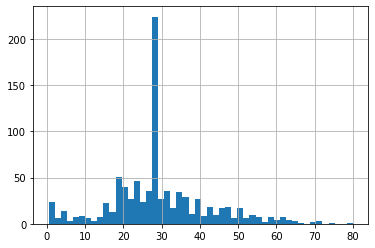

In [41]:
df5['Age'].hist(bins = 50)
plt.show()

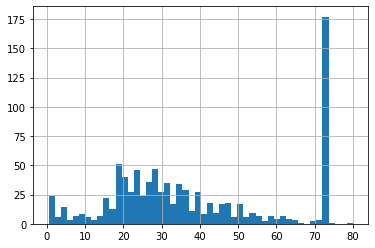

In [42]:
df5['Age_end_distribution'].hist(bins = 50)
plt.show()

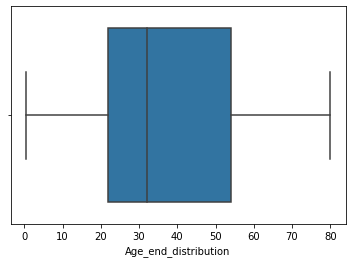

In [43]:
sns.boxplot(x = df5['Age_end_distribution'])
plt.show()

#### 6. Arbitrary imputation - from Kaggle

In [44]:
df6 = pd.read_csv("titanic.csv", usecols = ["Age","Fare","Survived"])

In [45]:
def impute_nan(df6, variable):
    df6[variable + '_zero'] = df6[variable].fillna(0)
    df6[variable + '_hundred'] = df6[variable].fillna(100)

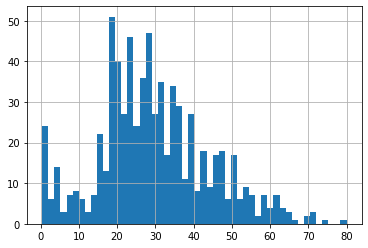

In [46]:
df6['Age'].hist(bins = 50)
plt.show()

In [47]:
impute_nan(df6, 'Age')

In [48]:
df6.head(20)

,Survived,Age,Fare,Age_zero,Age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,0.0,100.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


#### Advantages

1. Easy to implement
2. Captures the importance of missingess if there is one

#### Disadvantages

1. Distorts the original distribution of the variable
2. If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
3. Hard to decide which value to use

#### 7. Frequent categories imputation - Categorical missing values

In [49]:
pd.read_csv('loan.csv').head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [50]:
df7 = pd.read_csv('loan.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df7.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [51]:
df7.shape

(1460, 4)

In [52]:
df7.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

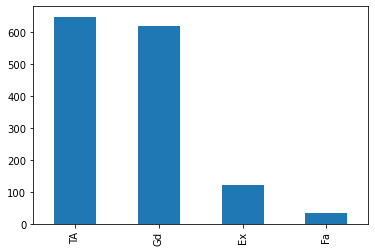

In [53]:
df7['BsmtQual'].value_counts().plot.bar()
plt.show()

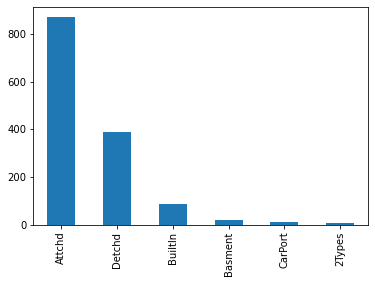

In [54]:
df7['GarageType'].value_counts().plot.bar()
plt.show()

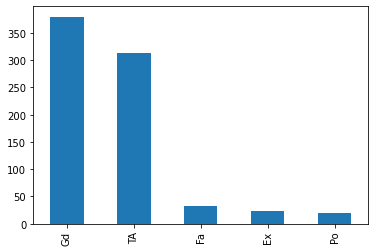

In [55]:
df7['FireplaceQu'].value_counts().plot.bar()
plt.show()

In [56]:
df7['GarageType'].value_counts().index[0]

'Attchd'

In [57]:
df7['GarageType'].mode()[0]

'Attchd'

In [58]:
def impute_nan(df7, variable):
    most_frequent_category = df7[variable].mode()[0]
    df7[variable].fillna(most_frequent_category, inplace = True)

In [59]:
for feature in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    impute_nan(df7, feature)

In [60]:
df7.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

In [61]:
df7.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


#### Advantages
1. Easy To implement
2. Fater way to implement

#### Disadvantages
1. Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
2. It distorts the relation of the most frequent label

#### 8. One Hot Encoding

In [62]:
df8 = pd.read_csv('titanic.csv', usecols = ['Sex'])
df8.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [63]:
pd.get_dummies(df8, drop_first = True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [64]:
df8 = pd.read_csv('titanic.csv', usecols = ['Embarked'])

In [65]:
df8['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [66]:
df8.dropna(inplace = True)

In [67]:
pd.get_dummies(df8, drop_first = True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [68]:
df8 = pd.read_csv('mercedes.csv', usecols = ["X0","X1","X2","X3","X4","X5","X6"])

In [69]:
df8.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [70]:
for i in df8.columns:
    print(len(df8[i].unique()))

47
27
44
7
4
29
12


In [71]:
df8.X1.value_counts().sort_values(ascending = False).head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

In [72]:
lst_10 = df8.X1.value_counts().sort_values(ascending = False).head(10).index
lst_10 = list(lst_10)

In [73]:
lst_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [74]:
for categories in lst_10:
    df8[categories] = np.where(df8['X1'] == categories, 1, 0)

In [75]:
lst_10.append('X1')

In [76]:
df8[lst_10]

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,s
4205,0,0,0,0,0,0,0,0,0,1,o
4206,0,0,0,0,1,0,0,0,0,0,v
4207,0,0,0,0,0,1,0,0,0,0,r


#### 9. Ordinal Number Encoding

In [77]:
import datetime
today_date = datetime.datetime.today()
today_date

datetime.datetime(2021, 3, 29, 9, 54, 55, 877843)

In [78]:
today_date - datetime.timedelta(3)

datetime.datetime(2021, 3, 26, 9, 54, 55, 877843)

In [79]:
# List Comprehension
days = [today_date - datetime.timedelta(x) for x in range(0,15)]

In [80]:
data = pd.DataFrame(days)
data.columns = ["Day"]

In [81]:
data.head()

,Day
0,2021-03-29 09:54:55.877843
1,2021-03-28 09:54:55.877843
2,2021-03-27 09:54:55.877843
3,2021-03-26 09:54:55.877843
4,2021-03-25 09:54:55.877843


In [82]:
data['weekday'] = data['Day'].dt.day_name()
data.head()

,Day,weekday
0,2021-03-29 09:54:55.877843,Monday
1,2021-03-28 09:54:55.877843,Sunday
2,2021-03-27 09:54:55.877843,Saturday
3,2021-03-26 09:54:55.877843,Friday
4,2021-03-25 09:54:55.877843,Thursday


In [83]:
dictionary = {'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}
dictionary

{'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6,
 'Sunday': 7}

In [84]:
data['weekday_ordinal'] = data['weekday'].map(dictionary)
data

,Day,weekday,weekday_ordinal
0,2021-03-29 09:54:55.877843,Monday,1
1,2021-03-28 09:54:55.877843,Sunday,7
2,2021-03-27 09:54:55.877843,Saturday,6
3,2021-03-26 09:54:55.877843,Friday,5
4,2021-03-25 09:54:55.877843,Thursday,4
5,2021-03-24 09:54:55.877843,Wednesday,3
6,2021-03-23 09:54:55.877843,Tuesday,2
7,2021-03-22 09:54:55.877843,Monday,1
8,2021-03-21 09:54:55.877843,Sunday,7
9,2021-03-20 09:54:55.877843,Saturday,6


#### 10. Count Or Frequency Encoding

In [85]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None, index_col = None)
train_set.head() 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [86]:
columns = [1,3,5,6,7,8,9,13]
train_set = train_set[columns]
train_set.columns = ['Employment', 'Degree', 'Status', 'Designation', 'family_job', 'Race', 'Sex', 'Country']
train_set.head()

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [87]:
for feature in train_set.columns[:]:
    print(feature, ":", len(train_set[feature].unique()), 'labels')

Employment : 9 labels
Degree : 16 labels
Status : 7 labels
Designation : 15 labels
family_job : 6 labels
Race : 5 labels
Sex : 2 labels
Country : 42 labels


In [88]:
country_map = train_set['Country'].value_counts().to_dict()

In [89]:
train_set['Country'] = train_set['Country'].map(country_map)
train_set.head(20)

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,29170
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,81
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,29170
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170


#### Advantages
1. Easy To Use
2. Not increasing feature space

#### Disadvantages
1. It will provide same weight if the frequencies are same

#### 11. Target Guided Ordinal Encoding
1. Ordering the labels according to the target
2. Replace the labels by the joint probability of being 1 or 0

In [90]:
df11 = pd.read_csv('titanic.csv', usecols = ['Cabin', 'Survived'])
df11.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [91]:
df11['Cabin'].fillna('Missing',inplace = True)
df11.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [92]:
df11['Cabin'] = df11['Cabin'].astype(str).str[0]
df11.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [93]:
df11.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [94]:
ordinal_labels = df11.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordinal_labels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [95]:
ordinal_labels2 = {k:i for i, k in enumerate(ordinal_labels, 0)}
ordinal_labels2

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [96]:
df11['Cabin_ordinal_labels'] = df11['Cabin'].map(ordinal_labels2)
df11.head()

,Survived,Cabin,Cabin_ordinal_labels
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


In [97]:
# Using Mean encoding

mean_ordinal = df11.groupby(['Cabin'])['Survived'].mean().to_dict()

In [98]:
mean_ordinal

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [99]:
df11['mean_ordinal_encode'] = df11['Cabin'].map(mean_ordinal)
df11.head()

# Rank is given based on highest rate of survival in cabin feature
# T is 0 ranked, D is 8 Ranked.

,Survived,Cabin,Cabin_ordinal_labels,mean_ordinal_encode
0,0,M,1,0.299854
1,1,C,4,0.593220
2,1,M,1,0.299854
3,1,C,4,0.593220
4,0,M,1,0.299854


#### 12. Probability Ratio Encoding

In [100]:
#1. Probability of Survived based on Cabin - Categorical Feature
#2. Probability of Not Survived - (1-pr(Survived))
#3. pr(Survived)/pr(Not Survived)
#4. Dictonary to map cabin with probability
#5. replace with the categorical feature

df12 = pd.read_csv('titanic.csv',usecols = ['Cabin','Survived'])
df12.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [101]:
### Replacing
df12['Cabin'].fillna('Missing', inplace = True)
df12.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [103]:
df12['Cabin'] = df12['Cabin'].astype(str).str[0]
df12.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [104]:
df12.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [105]:
prob_df = df12.groupby(['Cabin'])['Survived'].mean()
prob_df

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [106]:
prob_df = pd.DataFrame(prob_df)
prob_df

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
M,0.299854
T,0.000000


In [107]:
prob_df['Died'] = 1 - prob_df['Survived']

In [108]:
prob_df.head()

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000


In [109]:
prob_df['Probability_ratio'] = prob_df['Survived'] / prob_df['Died']
prob_df.head()

,Survived,Died,Probability_ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000


In [110]:
probability_encoded = prob_df['Probability_ratio'].to_dict()

In [111]:
df12['Cabin_encoded'] = df12['Cabin'].map(probability_encoded)
df12.head()

,Survived,Cabin,Cabin_encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274


#### 13. Transformation of Features

1. Linear Regression, Gradient Descent, Global Minima
2. Algorithms like KNN, K Means, Hierarichal Clustering, Eucledian Distance

        Every Point has some vectors and Directiom
        Deep Learning Techniques(Standardization, Scaling)
        
1. ANN > GLobal Minima, Gradient
2. CNN
3. RNN
4. Imaging 0-255 pixels

#### Types Of Transformation
1. Normalization And Standardization
2. Scaling to Minimum And Maximum values
3. Scaling To Median And Quantiles
4. Guassian Transformation
- Logarithmic Transformation
- Reciprocal Trnasformation
- Square Root Transformation
- Exponential Trnasformation
- Box Cox Transformation

#### Standardization
We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero.
z = (x - x_mean) / std

In [112]:
df13 = pd.read_csv('titanic.csv', usecols = ['Pclass','Age','Fare','Survived'])
df13.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [113]:
df13['Age'].fillna(df.Age.median(), inplace = True)

In [114]:
df13.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [115]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df13)

In [116]:
df_scaled

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

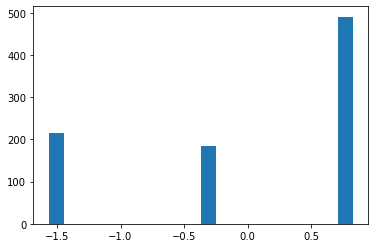

In [117]:
plt.hist(df_scaled[:,1], bins = 20)
plt.show()

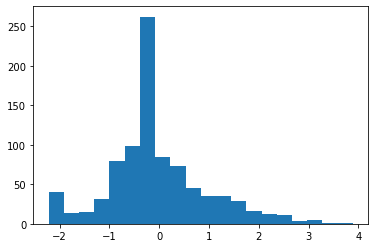

In [118]:
plt.hist(df_scaled[:,2],bins = 20)
plt.show()

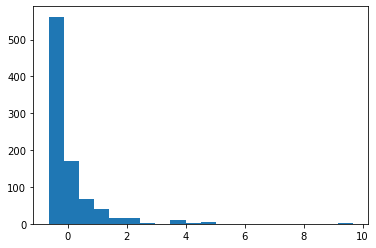

In [119]:
plt.hist(df_scaled[:,3], bins = 20)
plt.show()

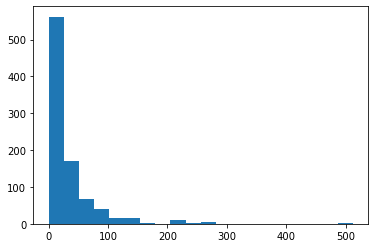

In [120]:
plt.hist(df13['Fare'], bins = 20)
plt.show()

#### Min Max Scaling  (CNN) Deep Learning Techniques
- Min Max Scaling scales the values between 0 to 1.
- X_scaled = (X - X.min / (X.max - X.min)

In [121]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_minmax = pd.DataFrame(min_max.fit_transform(df13), columns = df13.columns)
df_minmax.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


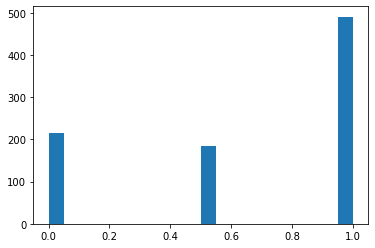

In [122]:
plt.hist(df_minmax['Pclass'], bins = 20)
plt.show()

#### Robust Scaler
    It is used to scale the feature to median and quantiles.
    Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

- IQR = 75th quantile - 25th quantile

- X_scaled = (X - X.median) / IQR

In [123]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_robust_scaler = pd.DataFrame(scaler.fit_transform(df13), columns = df13.columns)
df_robust_scaler.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


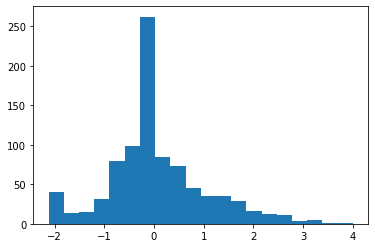

In [124]:
plt.hist(df_robust_scaler['Age'], bins = 20)
plt.show()

#### Guassian Transformation

    Some machine learning algorithms like linear and logistic assume that the features are normally distributed
    
- Accuracy
- Performance
- logarithmic transformation
- reciprocal transformation
- square root transformation
- exponential transformation (more general, you can use any exponent)
- boxcox transformation

In [125]:
df13 = pd.read_csv('titanic.csv', usecols = ['Age','Fare','Survived'])
df13.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [126]:
df13['Age'] = df13['Age'].fillna(df['Age'].median())

In [131]:
import scipy.stats as stat
import pylab

# To check whether feature is guassian or normal distributed
# Q-Q plot

def plot_data(df13, feature):
    plt.figure(figsize = (10,6))
    plt.subplot(1,2,1)
    df13[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df13[feature], dist = 'norm', plot = pylab)
    plt.show()

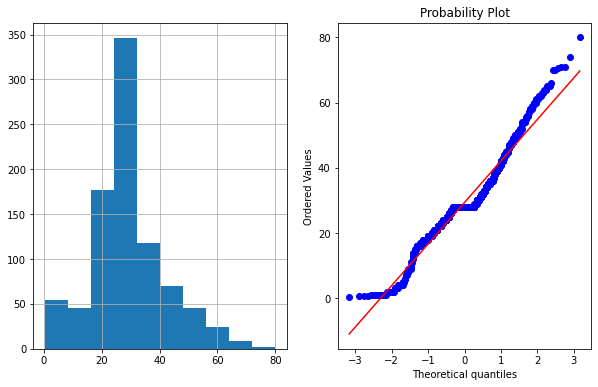

In [132]:
plot_data(df13, 'Age') #if it distribution follows straight line then it is gaussian or normally distributed

#### Logarithmic Transformation

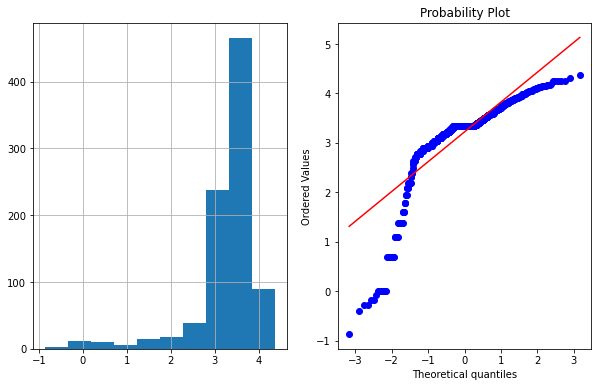

In [133]:
df13['Age_log'] = np.log(df13['Age'])
plot_data(df13, 'Age_log')

#### Reciprocal Trnasformation

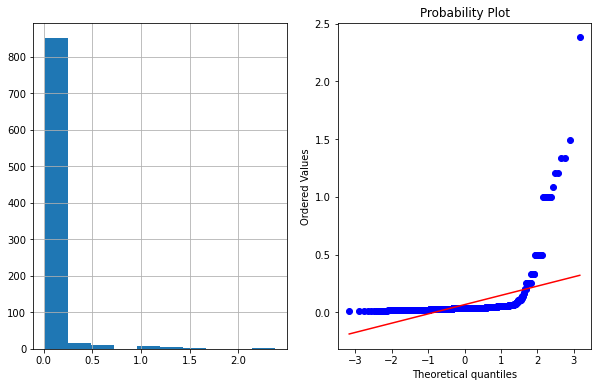

In [134]:
df13['Age_reciprocal'] = 1 / df13.Age
plot_data(df13, 'Age_reciprocal')

#### Square Root Transformation

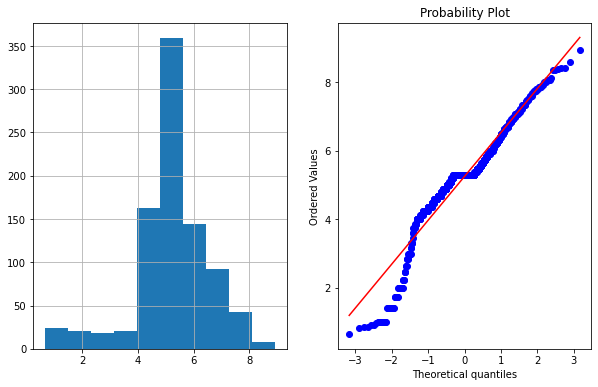

In [135]:
df13['Age_square'] = df13.Age**(1/2)
plot_data(df13, 'Age_square')

#### Exponential Transdormation

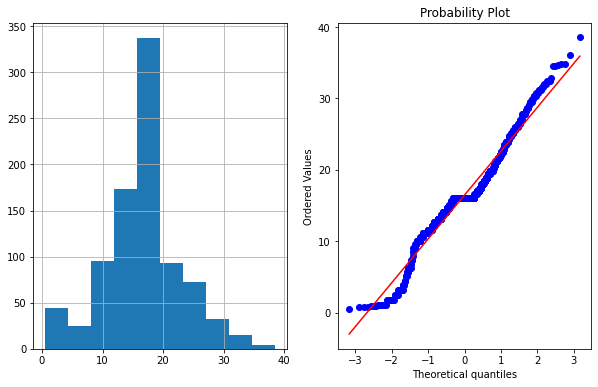

In [136]:
df13['Age_exponential'] = df13.Age**(1/1.2)
plot_data(df13, 'Age_exponential')

#### Box Cox Transformation

    T(Y)=(Y exp(λ)−1)/λ

    where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ  are considered and the optimal value for a given variable is selected.

In [137]:
df13['Age_Boxcox'],parameters = stat.boxcox(df13['Age'])

In [138]:
print(parameters)

0.7964531473656952


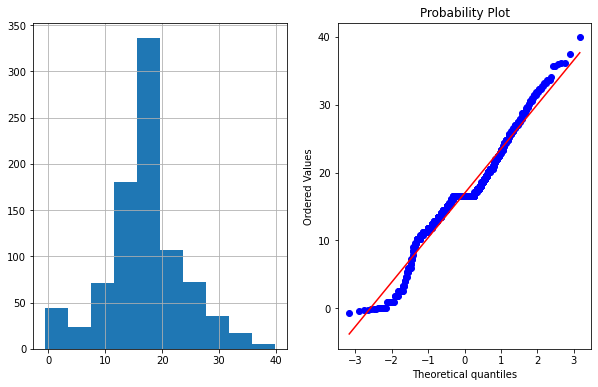

In [139]:
plot_data(df13, 'Age_Boxcox')

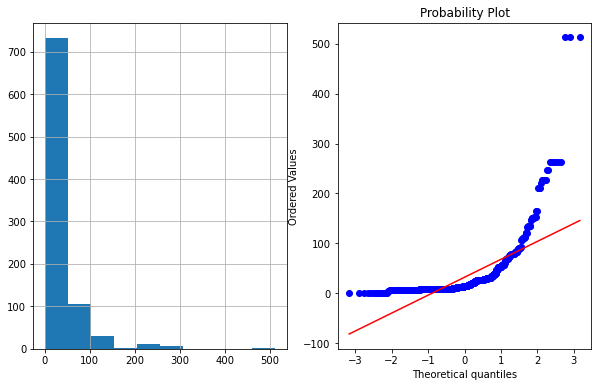

In [140]:
plot_data(df13, 'Fare')

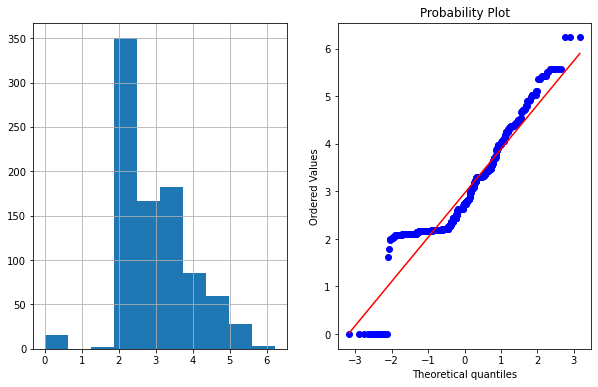

In [141]:
df13['Fare_log'] = np.log1p(df13['Fare'])
plot_data(df13, 'Fare_log')

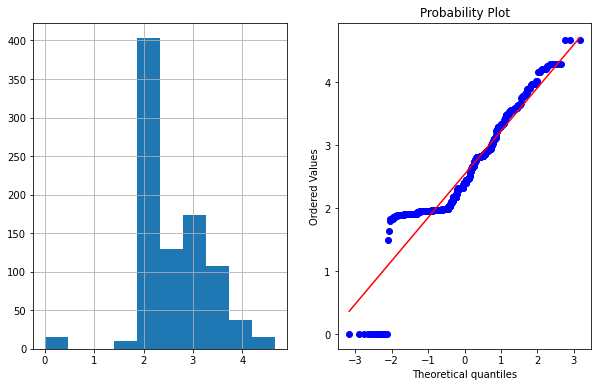

In [142]:
df13['Fare_Boxcox'],parameters = stat.boxcox(df13['Fare']+1)
plot_data(df13, 'Fare_Boxcox')

#### 14. KNNImputer

In [143]:
from sklearn.impute import KNNImputer

df14 = pd.read_csv('titanic.csv', usecols = ['Age','Fare','Survived'])
df14.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [144]:
df14.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [146]:
imputer = KNNImputer(n_neighbors = 5)
df_filled = imputer.fit_transform(df14)
New_df = pd.DataFrame(df_filled, columns = ['Survived', 'Age', 'Fare'])

In [147]:
New_df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

#### 15. Outlier Treatment
#### ML models behaviour to outliers
    1. Naivye Bayes Classifier ----------------- Not Sensitive To Outliers
    2. SVM ------------------------------------- Not Sensitive To Outliers          
    3. Linear Regression ----------------------- Sensitive To Outliers
    4. Logistic Regression --------------------- Sensitive To Outliers
    5. Decision Tree Regressor or Classifier --- Not Sensitive
    6. Ensemble(RF,XGboost,GB) ----------------- Not Sensitive
    7. KNN ------------------------------------- Not Sensitive 
    8. Kmeans ---------------------------------- Sensitive
    9. Hierarichal ----------------------------- Sensitive 
    10. PCA ------------------------------------ Sensitive 
    11. Neural Networks ------------------------ Sensitive

In [148]:
df15 = pd.read_csv('titanic.csv')
df15['Age'].isnull().sum()

177

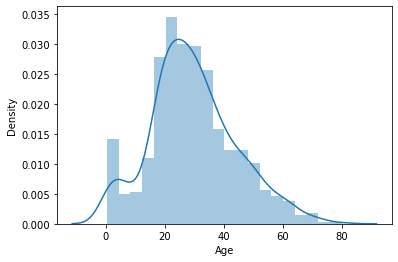

In [155]:
import warnings
warnings.filterwarnings("ignore")

sns.distplot(df15['Age'].dropna())
plt.show()

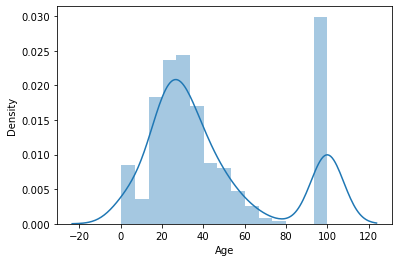

In [157]:
sns.distplot(df15['Age'].fillna(100))
plt.show()

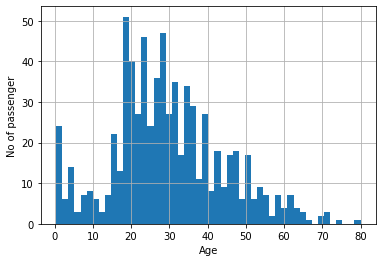

In [158]:
figure = df15.Age.hist(bins = 50)
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')
plt.show()

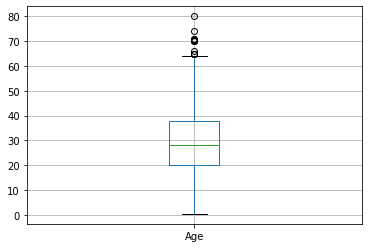

In [159]:
figure = df15.boxplot(column = "Age")

In [160]:
# For Normally distributed data
# Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers

uppper_boundary = df15['Age'].mean() + 3* df['Age'].std()
lower_boundary = df15['Age'].mean() - 3* df['Age'].std()

print(lower_boundary)
print(uppper_boundary)
print(df['Age'].mean())

-13.88037434994331
73.27860964406095
29.69911764705882


In [161]:
# For Skewed data
# Lets compute the Interquantile range to calculate the boundaries

IQR = df15.Fare.quantile(0.75) - df15.Fare.quantile(0.25)

lower_bridge = df15['Fare'].quantile(0.25) - (IQR*1.5)
upper_bridge = df15['Fare'].quantile(0.75) + (IQR*1.5)

print(lower_bridge)
print(upper_bridge)

-26.724
65.6344


In [162]:
# Extreme outliers

lower_bridge = df15['Fare'].quantile(0.25) - (IQR*3)
upper_bridge = df15['Fare'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

-61.358399999999996
100.2688


In [163]:
data = df15.copy()

In [164]:
data.loc[data['Age'] >= 73, 'Age'] = 73
data.loc[data['Fare'] >= 100, 'Fare'] = 100

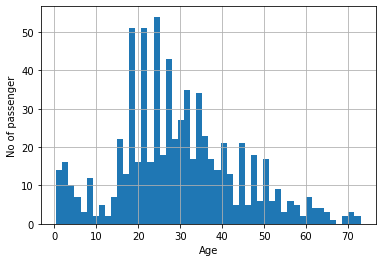

In [167]:
figure = data.Age.hist(bins = 50)
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')
plt.show()

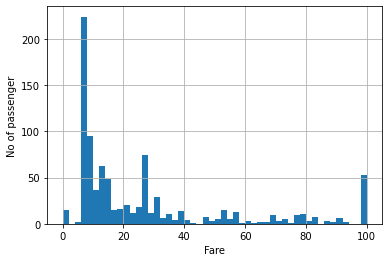

In [168]:
figure = data.Fare.hist(bins = 50)
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')
plt.show()

In [180]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['Age','Fare']]
                                                    .fillna(0), data['Survived'], test_size = 0.3)

In [181]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score, roc_auc_score

print("Accuracy_score: {}".format(accuracy_score(y_test, y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test, y_pred1[:,1])))

Accuracy_score: 0.6455223880597015
roc_auc_score: 0.664988425925926
